In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import DCCSMLM
import sys
from scipy.optimize import curve_fit

%matplotlib notebook

In [2]:
filename = "ExampleData/20190316_beads.SciH5"

raw_data = DCCSMLM.DCCSMLM()
channels = raw_data.load_channel(filename) # Get a list of available channels
i = 0

# Load all available channels
for channel_id in channels:
    if channel_id.endswith(".locs"):
        print(f"Loading {channel_id}")
        raw_data.load_channel(filename, channel=channel_id, channel_id=channel_id[-7:-5])
        i += 1



Please define a channel to load. Available channels are:
Loading 20190316_bead_a1.locs
Loading 20190316_bead_a2.locs
Loading 20190316_bead_b1.locs
Loading 20190316_bead_b2.locs
Loading 20190316_bead_c1.locs
Loading 20190316_bead_c2.locs
Loading 20190316_bead_d1.locs
Loading 20190316_bead_d2.locs
Loading 20190316_bead_e1.locs
Loading 20190316_bead_e2.locs
Loading 20190316_bead_f1.locs
Loading 20190316_bead_f2.locs
Loading 20190316_bead_g1.locs
Loading 20190316_bead_g2.locs
Loading 20190316_bead_h1.locs
Loading 20190316_bead_h2.locs
Loading 20190316_bead_i1.locs
Loading 20190316_bead_i2.locs
Loading 20190316_bead_j1.locs
Loading 20190316_bead_j2.locs
Loading 20190316_bead_k1.locs
Loading 20190316_bead_k2.locs
Loading 20190316_bead_l1.locs
Loading 20190316_bead_l2.locs
Loading 20190316_bead_m1.locs
Loading 20190316_bead_m2.locs
Loading 20190316_bead_n1.locs
Loading 20190316_bead_n2.locs
Loading 20190316_bead_o1.locs
Loading 20190316_bead_o2.locs
Loading 20190316_bead_p1.locs
Loading 20190

In [3]:
for channel in raw_data.channel:
    # Find the fiducial markers in the channels based on an intensity_threshold and min_samples
    raw_data.channel[channel].find_clusters(intensity_threshold=50, min_samples=40, eps=50, save_column="bead_id") 



<IPython.core.display.Javascript object>


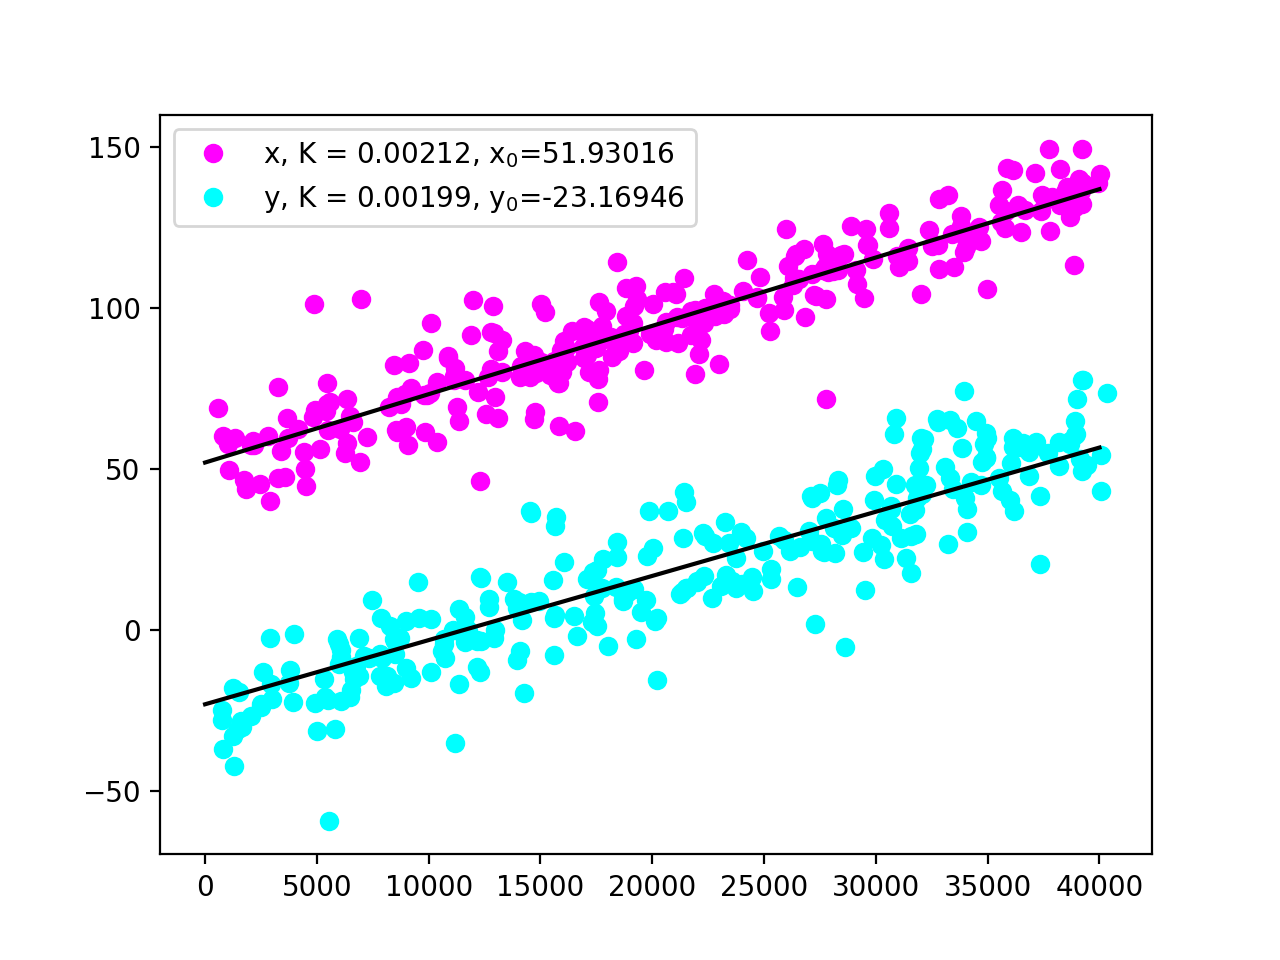

In [16]:
def linear_func(x, a, b):
    return a * x + b

# List of the channels to analyze with a combination of (mVenus channel, PAmCherry channel)
ca_list = [("a1", "a2"),("b1", "b2"), ("c1", "c2"),("d1", "d2"),("e1", "e2"), ("f1", "f2"),
          ("g1", "g2"),("h1", "h2"), ("i1", "i2"),("j1", "j2"),("k1", "k2"), ("l1", "l2"),
          ("m1", "m2"),("n1", "n2"), ("o1", "o2"),("p1", "p2"),("q1", "q2"), ("r1", "r2"),
          ("s1", "s2"),("t1", "t2")]

ca = pd.DataFrame([]) # This will contain the parameters of the linear fit of the CA
ca_df = pd.DataFrame([]) # This will contain the individual values used for fitting. Only for display purposes.

for ca_set in ca_list:
    # Determine closest clusters (as surrogate for chromatic aberration (CA)) of channel_two
    # relative to channel_one
    ca_channel, ca_channel_df = raw_data.determine_chromatic_aberration(ca_set[0], ca_set[1], "bead_id",
                                                                        distance_cutoff=400)
    ca_channel = pd.DataFrame([ca_channel])
    ca = pd.concat([ca, ca_channel])
    ca_df= pd.concat([ca_df, ca_channel_df])
    #ca = raw_data.determine_chromatic_aberration(ca_set[0], ca_set[1], "bead_id", distance_cutoff=400)
 
ca.reset_index(inplace=True, drop=True) 
ca.columns=["Kx", "Ky", "x0", "y0"]
ca = ca.mean()


plt.figure()
# Plot the individual values of the markers on the x-axis
plt.plot(ca_df.x, ca_df.x_distance, marker="o", lw=0.0, color="magenta", 
         label=f"x, K = {round(ca.Kx,5)}, x$_0$={round(ca.x0, 5)}")
# Plot the fit of the CA along the x-axis
plt.plot([0, 40000], [linear_func(0, ca.Kx, ca.x0), linear_func(40000, ca.Kx, ca.x0)], color="black")

# Plot the individual values of the narjers on the y-axis
plt.plot(ca_df.y, ca_df.y_distance, marker="o", lw=0.0, color="cyan", 
         label=f"y, K = {round(ca.Ky, 5)}, y$_0$={round(ca.y0, 5)}")
# Plot the fit of the CA along the y-axis

plt.plot([0, 40000], [linear_func(0, ca.Ky, ca.y0), linear_func(40000, ca.Ky, ca.y0)], color="black")


plt.legend()
plt.show()

In [19]:
ca_parameters = {"label": ["PAmCherry"], 
                             "Kx": [ca.Kx], "x0": [ca.x0], "Ky": [ca.Ky], "y0": [ca.y0]}
ca_parameters = pd.DataFrame(ca_parameters)
ca_parameters.to_csv("ExampleData/CA_parameters.csv")